<a href="https://colab.research.google.com/github/fjadidi2001/DataScienceJourney/blob/master/predict_ClaimYN_with_combined_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Load the dataset
from google.colab import drive
import pandas as pd
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Specify file path
file_path = '/content/drive/My Drive/telematics_syn.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Step 2: Explore the data
print("First few rows of the dataset:")
print(data.head())
print("\nDataset information:")
print(data.info())
print("\nChecking for missing values:")
print(data.isnull().sum())
print("\nBasic statistics:")
print(data.describe())


Mounted at /content/drive
First few rows of the dataset:
   Duration  Insured.age Insured.sex  Car.age  Marital  Car.use  Credit.score  \
0       366           45        Male       -1  Married  Commute         609.0   
1       182           44      Female        3  Married  Commute         575.0   
2       184           48      Female        6  Married  Commute         847.0   
3       183           71        Male        6  Married  Private         842.0   
4       183           84        Male       10  Married  Private         856.0   

  Region  Annual.miles.drive  Years.noclaims  ...  Left.turn.intensity10  \
0  Urban             6213.71              25  ...                    1.0   
1  Urban            12427.42              20  ...                   58.0   
2  Urban            12427.42              14  ...                    0.0   
3  Urban             6213.71              43  ...                    0.0   
4  Urban             6213.71              65  ...                    2.0   


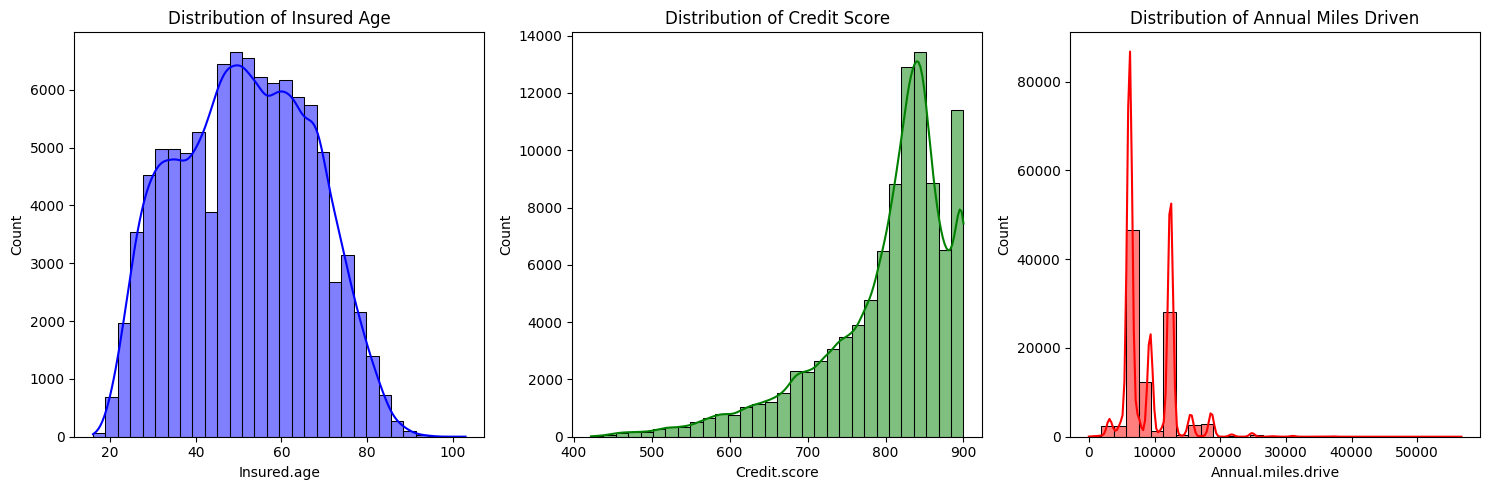

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution for key variables
plt.figure(figsize=(15, 5))

# Insured.age distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Insured.age'], kde=True, bins=30, color='blue')
plt.title('Distribution of Insured Age')

# Credit.score distribution
plt.subplot(1, 3, 2)
sns.histplot(data['Credit.score'], kde=True, bins=30, color='green')
plt.title('Distribution of Credit Score')

# Annual.miles.drive distribution
plt.subplot(1, 3, 3)
sns.histplot(data['Annual.miles.drive'], kde=True, bins=30, color='red')
plt.title('Distribution of Annual Miles Driven')

plt.tight_layout()
plt.show()


In [2]:

# Step 3: Create target variable ClaimYN
data['ClaimYN'] = ((data['NB_Claim'] >= 1) & (data['AMT_Claim'] > 1000)).astype(int)

# Display distribution of ClaimYN
print("\nDistribution of ClaimYN:")
print(data['ClaimYN'].value_counts(normalize=True) * 100)
print("\nAbsolute counts:")
print(data['ClaimYN'].value_counts())


Distribution of ClaimYN:
ClaimYN
0    97.302
1     2.698
Name: proportion, dtype: float64

Absolute counts:
ClaimYN
0    97302
1     2698
Name: count, dtype: int64


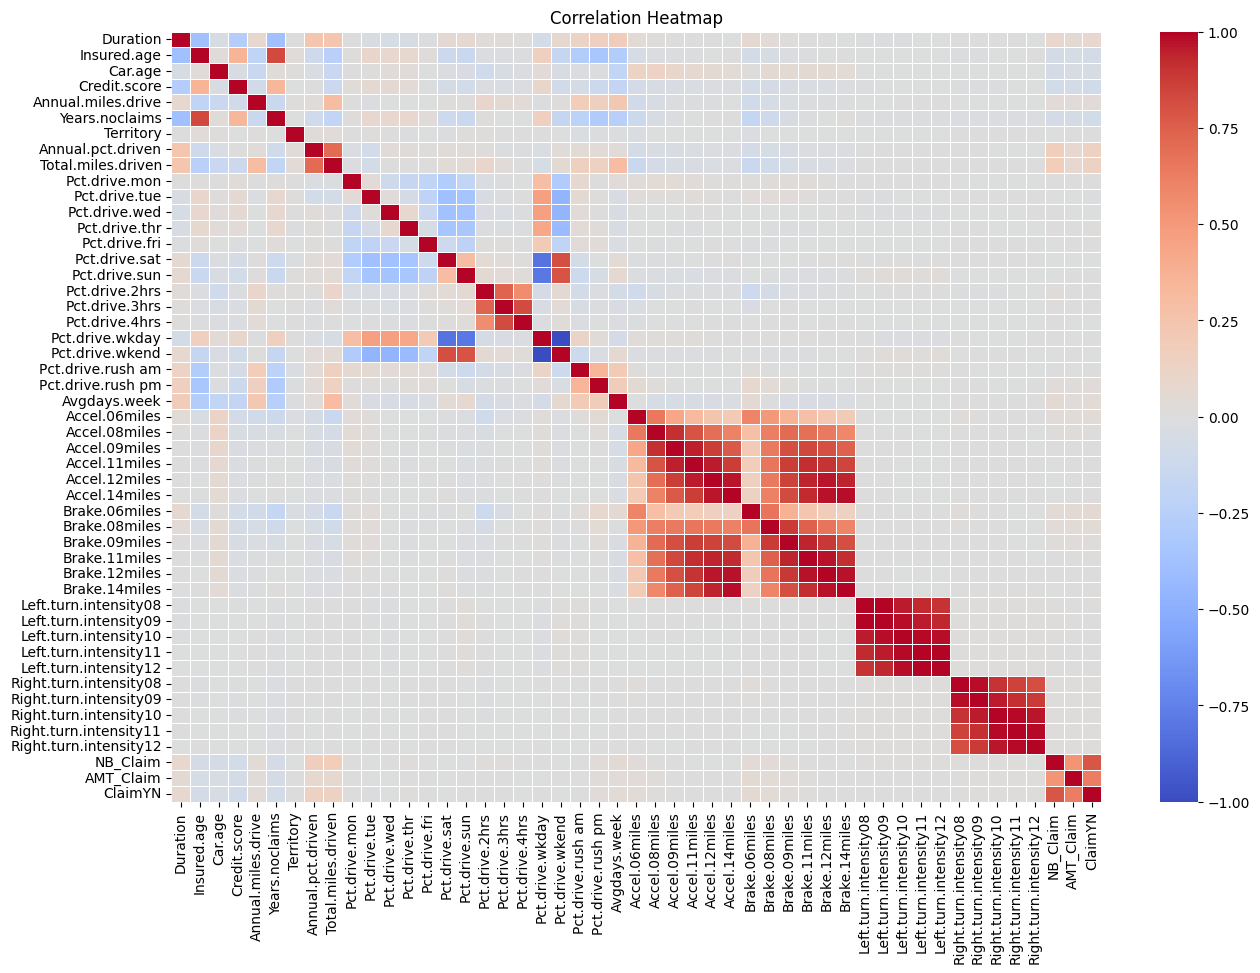

In [27]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
corr_matrix = data[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [3]:
# Import additional required libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separate features and target
# Exclude NB_Claim and AMT_Claim as they were used to create the target
features = data.drop(['ClaimYN', 'NB_Claim', 'AMT_Claim'], axis=1)

# Convert categorical variables to numeric using one-hot encoding
categorical_columns = ['Insured.sex', 'Marital', 'Car.use', 'Region']
features = pd.get_dummies(features, columns=categorical_columns)

X = features
y = data['ClaimYN']

# First split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Print the distribution of classes before and after SMOTE
print("\nClass distribution before SMOTE:")
print(Counter(y_train))

print("\nClass distribution after SMOTE:")
print(Counter(y_train_balanced))

# Print the shapes of the resulting datasets
print("\nDataset shapes:")
print(f"X_train_balanced: {X_train_balanced.shape}")
print(f"y_train_balanced: {y_train_balanced.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")


Class distribution before SMOTE:
Counter({0: 77842, 1: 2158})

Class distribution after SMOTE:
Counter({0: 77842, 1: 77842})

Dataset shapes:
X_train_balanced: (155684, 56)
y_train_balanced: (155684,)
X_test: (20000, 56)
y_test: (20000,)


In [4]:
# Import required libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import numpy as np

# Separate features and target
# Exclude NB_Claim and AMT_Claim as they were used to create the target
features = data.drop(['ClaimYN', 'NB_Claim', 'AMT_Claim'], axis=1)

# Convert categorical variables to numeric using one-hot encoding
categorical_columns = ['Insured.sex', 'Marital', 'Car.use', 'Region']
features = pd.get_dummies(features, columns=categorical_columns)

X = features
y = data['ClaimYN']

# Print initial class distribution
print("Initial class distribution:")
print(Counter(y))

# First split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print distribution after split
print("\nClass distribution after split:")
print("Training set:", Counter(y_train))
print("Test set:", Counter(y_test))

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Print the distribution after SMOTE
print("\nClass distribution after SMOTE (training set only):")
print(Counter(y_train_balanced))

# Print the shapes of the resulting datasets
print("\nDataset shapes:")
print(f"Original dataset: {X.shape}")
print(f"X_train_balanced: {X_train_balanced.shape}")
print(f"y_train_balanced: {y_train_balanced.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Initial class distribution:
Counter({0: 97302, 1: 2698})

Class distribution after split:
Training set: Counter({0: 77842, 1: 2158})
Test set: Counter({0: 19460, 1: 540})

Class distribution after SMOTE (training set only):
Counter({0: 77842, 1: 77842})

Dataset shapes:
Original dataset: (100000, 56)
X_train_balanced: (155684, 56)
y_train_balanced: (155684,)
X_test: (20000, 56)
y_test: (20000,)


In [5]:
# Import required libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd
import numpy as np

# Print initial column count
print("Initial number of columns:", len(data.columns))

# Separate features and target
# Exclude NB_Claim and AMT_Claim as they were used to create the target
features = data.drop(['ClaimYN', 'NB_Claim', 'AMT_Claim'], axis=1)
print("\nNumber of columns after dropping target and claim columns:", len(features.columns))

# Print categorical columns unique values
print("\nUnique values in categorical columns:")
categorical_columns = ['Insured.sex', 'Marital', 'Car.use', 'Region']
for col in categorical_columns:
    print(f"{col}: {features[col].unique()}")

# Convert categorical variables to numeric using one-hot encoding
features = pd.get_dummies(features, columns=categorical_columns)
print("\nColumns after one-hot encoding:")
print(features.columns.tolist())
print("\nTotal number of columns after encoding:", len(features.columns))

X = features
y = data['ClaimYN']

# Proceed with train-test split and SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Print final shapes
print("\nFinal dataset shapes:")
print(f"Original features: {X.shape}")
print(f"X_train_balanced: {X_train_balanced.shape}")
print(f"X_test: {X_test.shape}")

Initial number of columns: 53

Number of columns after dropping target and claim columns: 50

Unique values in categorical columns:
Insured.sex: ['Male' 'Female']
Marital: ['Married' 'Single']
Car.use: ['Commute' 'Private' 'Commercial' 'Farmer']
Region: ['Urban' 'Rural']

Columns after one-hot encoding:
['Duration', 'Insured.age', 'Car.age', 'Credit.score', 'Annual.miles.drive', 'Years.noclaims', 'Territory', 'Annual.pct.driven', 'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue', 'Pct.drive.wed', 'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat', 'Pct.drive.sun', 'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday', 'Pct.drive.wkend', 'Pct.drive.rush am', 'Pct.drive.rush pm', 'Avgdays.week', 'Accel.06miles', 'Accel.08miles', 'Accel.09miles', 'Accel.11miles', 'Accel.12miles', 'Accel.14miles', 'Brake.06miles', 'Brake.08miles', 'Brake.09miles', 'Brake.11miles', 'Brake.12miles', 'Brake.14miles', 'Left.turn.intensity08', 'Left.turn.intensity09', 'Left.turn.intensity1

In [6]:
# Import required libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import numpy as np

# Feature Engineering
def create_aggregated_features(df):
    """Create aggregated features from existing ones"""

    # Aggregate acceleration features
    df['Agg_Accel'] = df[[
        'Accel.06miles', 'Accel.08miles', 'Accel.09miles',
        'Accel.11miles', 'Accel.12miles', 'Accel.14miles'
    ]].mean(axis=1)

    # Aggregate braking features
    df['Agg_Brake'] = df[[
        'Brake.06miles', 'Brake.08miles', 'Brake.09miles',
        'Brake.11miles', 'Brake.12miles', 'Brake.14miles'
    ]].mean(axis=1)

    # Aggregate left turn features
    df['Agg_Left_Turn'] = df[[
        'Left.turn.intensity08', 'Left.turn.intensity09', 'Left.turn.intensity10',
        'Left.turn.intensity11', 'Left.turn.intensity12'
    ]].mean(axis=1)

    # Aggregate right turn features
    df['Agg_Right_Turn'] = df[[
        'Right.turn.intensity08', 'Right.turn.intensity09', 'Right.turn.intensity10',
        'Right.turn.intensity11', 'Right.turn.intensity12'
    ]].mean(axis=1)

    # Create overall harsh driving score
    df['Harsh_Driving_Score'] = (
        df['Agg_Accel'] + df['Agg_Brake'] +
        df['Agg_Left_Turn'] + df['Agg_Right_Turn']
    ) / 4

    # Create rush hour driving ratio
    df['Rush_Hour_Ratio'] = (
        df['Pct.drive.rush am'] + df['Pct.drive.rush pm']
    ) / df['Total.miles.driven']

    return df

# Standardization function
def standardize_features(X_train, X_test):
    """Standardize numerical features"""
    scaler = StandardScaler()

    # Get numerical columns (exclude dummy variables)
    numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

    # Fit and transform training data
    X_train_scaled = X_train.copy()
    X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

    # Transform test data
    X_test_scaled = X_test.copy()
    X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

    return X_train_scaled, X_test_scaled, scaler

# Apply preprocessing pipeline
def preprocess_data(X_train, X_test):
    """Complete preprocessing pipeline"""

    # 1. Feature Engineering
    print("Applying feature engineering...")
    X_train = create_aggregated_features(X_train)
    X_test = create_aggregated_features(X_test)

    # 2. Standardization
    print("Standardizing features...")
    X_train_scaled, X_test_scaled, scaler = standardize_features(X_train, X_test)

    # Print feature names and their shapes
    print("\nFinal feature set:")
    print(f"Training set shape: {X_train_scaled.shape}")
    print(f"Test set shape: {X_test_scaled.shape}")
    print("\nFeatures included:")
    print(X_train_scaled.columns.tolist())

    return X_train_scaled, X_test_scaled, scaler

# Apply preprocessing to our balanced dataset
X_train_processed, X_test_processed, scaler = preprocess_data(X_train_balanced, X_test)

# Print sample statistics to verify preprocessing
print("\nSample statistics after preprocessing:")
print(X_train_processed.describe().round(2))

Applying feature engineering...
Standardizing features...

Final feature set:
Training set shape: (155684, 62)
Test set shape: (20000, 62)

Features included:
['Duration', 'Insured.age', 'Car.age', 'Credit.score', 'Annual.miles.drive', 'Years.noclaims', 'Territory', 'Annual.pct.driven', 'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue', 'Pct.drive.wed', 'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat', 'Pct.drive.sun', 'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday', 'Pct.drive.wkend', 'Pct.drive.rush am', 'Pct.drive.rush pm', 'Avgdays.week', 'Accel.06miles', 'Accel.08miles', 'Accel.09miles', 'Accel.11miles', 'Accel.12miles', 'Accel.14miles', 'Brake.06miles', 'Brake.08miles', 'Brake.09miles', 'Brake.11miles', 'Brake.12miles', 'Brake.14miles', 'Left.turn.intensity08', 'Left.turn.intensity09', 'Left.turn.intensity10', 'Left.turn.intensity11', 'Left.turn.intensity12', 'Right.turn.intensity08', 'Right.turn.intensity09', 'Right.turn.intensity10', 'Right.turn.in

This preprocessing pipeline:

1. **Feature Engineering**:
   - Aggregates acceleration/braking features
   - Creates composite turn intensity metrics
   - Calculates a harsh driving score
   - Computes rush hour driving ratio

2. **Standardization**:
   - Applies StandardScaler to numerical features
   - Preserves dummy variables from one-hot encoding

3. **Organization**:
   - Uses functions for modularity and reusability
   - Includes progress printing and verification steps

The code will output:
- The shape of processed datasets
- List of final features
- Basic statistics of processed features


In [8]:
!pip install pytorch_tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.6 MB/s eta 0:00:00


In [11]:

# Convert data to numpy arrays for TabNet
X_train_tab = X_train_processed.values
X_test_tab = X_test_processed.values
y_train_tab = y_train_balanced.values
y_test_tab = y_test.values

# Initialize TabNet classifier
tabnet_model = TabNetClassifier(
    n_d=64, n_a=64,
    n_steps=5,
    gamma=1.5,
    n_independent=2,
    n_shared=2,
    cat_idxs=[],
    cat_dims=[],
    cat_emb_dim=[],
    lambda_sparse=1e-4,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type="entmax",
    scheduler_params=dict(
        mode="min",
        patience=5,
        min_lr=1e-5,
        factor=0.9,
    ),
    scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
    verbose=10,
    device_name='cuda' if torch.cuda.is_available() else 'cpu'
)


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [18]:
# Import required libraries
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, matthews_corrcoef, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Convert data to numpy arrays and ensure correct data types
X_train_tab = X_train_processed.astype(np.float32).values
X_test_tab = X_test_processed.astype(np.float32).values
y_train_tab = y_train_balanced.astype(np.int64).values
y_test_tab = y_test.astype(np.int64).values

# Print shapes and data types for verification
print("Training data shape:", X_train_tab.shape)
print("Test data shape:", X_test_tab.shape)
print("Training labels shape:", y_train_tab.shape)
print("Test labels shape:", y_test_tab.shape)
print("\nData types:")
print("X_train_tab dtype:", X_train_tab.dtype)
print("y_train_tab dtype:", y_train_tab.dtype)


Training data shape: (155684, 62)
Test data shape: (20000, 62)
Training labels shape: (155684,)
Test labels shape: (20000,)

Data types:
X_train_tab dtype: float32
y_train_tab dtype: int64


In [19]:

# Initialize TabNet classifier
tabnet_model = TabNetClassifier(
    n_d=64,  # Width of the decision prediction layer
    n_a=64,  # Width of the attention embedding for each mask
    n_steps=5,  # Number of steps in the architecture
    gamma=1.5,
    n_independent=2,
    n_shared=2,
    cat_idxs=[],  # No categorical indices in our preprocessed data
    cat_dims=[],  # No categorical dimensions
    cat_emb_dim=[],
    lambda_sparse=1e-4,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    mask_type="entmax",
    scheduler_params=dict(
        mode="min",
        patience=5,
        min_lr=1e-5,
        factor=0.9,
    ),
    scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
    verbose=1,
    device_name='cuda' if torch.cuda.is_available() else 'cpu'
)

try:
    # Train TabNet with error handling
    print("\nStarting TabNet training...")
    tabnet_model.fit(
        X_train_tab, y_train_tab,
        eval_set=[(X_test_tab, y_test_tab)],
        max_epochs=10,
        patience=10,
        batch_size=1024,
        virtual_batch_size=128
    )

    # Make predictions
    print("\nMaking predictions...")
    y_pred_tabnet = tabnet_model.predict(X_test_tab)
    y_pred_proba_tabnet = tabnet_model.predict_proba(X_test_tab)[:, 1]

    # Calculate metrics
    metrics_tabnet = {
        'accuracy': accuracy_score(y_test_tab, y_pred_tabnet),
        'precision': precision_score(y_test_tab, y_pred_tabnet),
        'recall': recall_score(y_test_tab, y_pred_tabnet),
        'f1': f1_score(y_test_tab, y_pred_tabnet),
        'auc': roc_auc_score(y_test_tab, y_pred_proba_tabnet),
        'matthews_corr': matthews_corrcoef(y_test_tab, y_pred_tabnet)
    }

    # Calculate ROC curve
    fpr_tabnet, tpr_tabnet, _ = roc_curve(y_test_tab, y_pred_proba_tabnet)

    # Print metrics
    print("\nTabNet Performance Metrics:")
    for metric, value in metrics_tabnet.items():
        print(f"{metric}: {value:.4f}")

    # Save ROC curve data
    tabnet_roc = {
        'fpr': fpr_tabnet,
        'tpr': tpr_tabnet,
        'auc': metrics_tabnet['auc']
    }

except Exception as e:
    print(f"\nAn error occurred: {str(e)}")
    print("\nDebug information:")
    print("X_train_tab unique values:", np.unique(X_train_tab))
    print("y_train_tab unique values:", np.unique(y_train_tab))

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")



Starting TabNet training...
epoch 0  | loss: 0.50332 | val_0_auc: 0.77315 |  0:00:09s
epoch 1  | loss: 0.30626 | val_0_auc: 0.79722 |  0:00:19s
epoch 2  | loss: 0.25764 | val_0_auc: 0.82711 |  0:00:30s
epoch 3  | loss: 0.25087 | val_0_auc: 0.81428 |  0:00:40s
epoch 4  | loss: 0.24288 | val_0_auc: 0.82244 |  0:00:50s
epoch 5  | loss: 0.22325 | val_0_auc: 0.83404 |  0:01:00s
epoch 6  | loss: 0.19628 | val_0_auc: 0.83454 |  0:01:11s
epoch 7  | loss: 0.15717 | val_0_auc: 0.85791 |  0:01:21s
epoch 8  | loss: 0.1465  | val_0_auc: 0.84498 |  0:01:31s
epoch 9  | loss: 0.15832 | val_0_auc: 0.8435  |  0:01:41s
Stop training because you reached max_epochs = 10 with best_epoch = 7 and best_val_0_auc = 0.85791


/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Making predictions...

TabNet Performance Metrics:
accuracy: 0.9262
precision: 0.1812
recall: 0.4926
f1: 0.2649
auc: 0.8579
matthews_corr: 0.2678



Confusion Matrix:
[[18258  1202]
 [  274   266]]


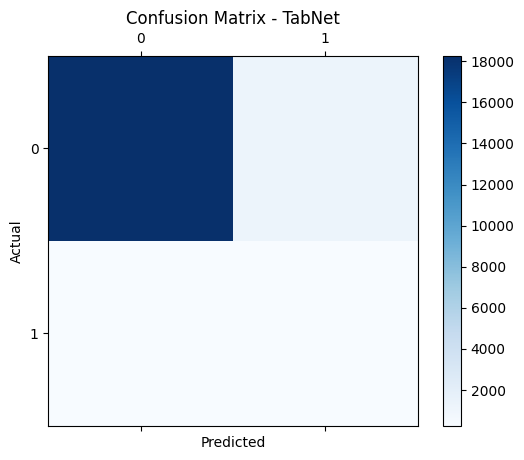

In [20]:
from sklearn.metrics import confusion_matrix

# Add this after calculating other metrics
# Calculate the confusion matrix
conf_matrix_tabnet = confusion_matrix(y_test_tab, y_pred_tabnet)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix_tabnet)

# Optionally, visualize the confusion matrix using matplotlib
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix_tabnet, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - TabNet")
plt.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [22]:
# Import XGBoost
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, matthews_corrcoef, roc_curve
import numpy as np

# Convert data format for XGBoost
dtrain = xgb.DMatrix(X_train_processed, label=y_train_balanced)
dtest = xgb.DMatrix(X_test_processed, label=y_test)

# Set XGBoost parameters
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth': 6,
    'min_child_weight': 1,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eta': 0.1,
    'seed': 42
}

# Train XGBoost model
num_rounds = 100
watchlist = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(
    xgb_params,
    dtrain,
    num_rounds,
    watchlist,
    early_stopping_rounds=20,
    verbose_eval=10
)

# Make predictions
y_pred_proba_xgb = xgb_model.predict(dtest)
y_pred_xgb = (y_pred_proba_xgb > 0.5).astype(int)

# Calculate metrics
metrics_xgb = {
    'accuracy': accuracy_score(y_test, y_pred_xgb),
    'precision': precision_score(y_test, y_pred_xgb),
    'recall': recall_score(y_test, y_pred_xgb),
    'f1': f1_score(y_test, y_pred_xgb),
    'auc': roc_auc_score(y_test, y_pred_proba_xgb),
    'matthews_corr': matthews_corrcoef(y_test, y_pred_xgb)
}

# Calculate ROC curve for later plotting
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

# Print metrics
print("\nXGBoost Performance Metrics:")
for metric, value in metrics_xgb.items():
    print(f"{metric}: {value:.4f}")

# Save ROC curve data for later comparison
xgb_roc = {
    'fpr': fpr_xgb,
    'tpr': tpr_xgb,
    'auc': metrics_xgb['auc']
}

# Feature importance (optional)
feature_importance = xgb_model.get_score(importance_type='gain')
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 Most Important Features:")
for feature, importance in sorted_importance[:10]:
    print(f"{feature}: {importance:.4f}")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-auc:0.91779	eval-auc:0.78382
[10]	train-auc:0.96458	eval-auc:0.82748
[20]	train-auc:0.97864	eval-auc:0.83829
[30]	train-auc:0.98464	eval-auc:0.84740
[40]	train-auc:0.98862	eval-auc:0.85398
[50]	train-auc:0.99112	eval-auc:0.85906
[60]	train-auc:0.99310	eval-auc:0.86288
[70]	train-auc:0.99454	eval-auc:0.86680
[80]	train-auc:0.99567	eval-auc:0.87113
[90]	train-auc:0.99650	eval-auc:0.87359
[99]	train-auc:0.99714	eval-auc:0.87637

XGBoost Performance Metrics:
accuracy: 0.9597
precision: 0.2900
recall: 0.3389
f1: 0.3126
auc: 0.8764
matthews_corr: 0.2929

Top 10 Most Important Features:
Annual.pct.driven: 677.3899
Brake.12miles: 618.3091
Car.use_Private: 530.4218
Insured.sex_Female: 496.8815
Marital_Married: 366.4525
Marital_Single: 338.0028
Insured.sex_Male: 327.1604
Brake.11miles: 325.0722
Brake.09miles: 321.7155
Accel.09miles: 305.9319



Ensemble Model Performance Metrics:
accuracy: 0.9535
precision: 0.2675
recall: 0.4167
f1: 0.3259
auc: 0.8836
matthews_corr: 0.3109


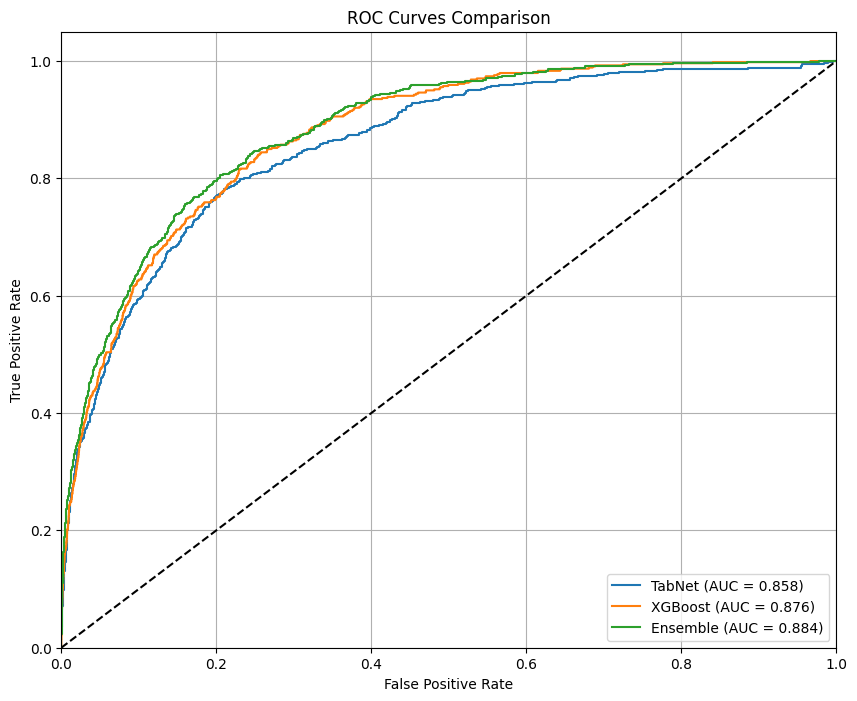


Model Comparison:
               TabNet  XGBoost  Ensemble
accuracy       0.9262   0.9598    0.9534
precision      0.1812   0.2900    0.2675
recall         0.4926   0.3389    0.4167
f1             0.2649   0.3126    0.3259
auc            0.8579   0.8764    0.8836
matthews_corr  0.2678   0.2929    0.3109


In [23]:
# Create ensemble predictions (simple average)
y_pred_proba_ensemble = (y_pred_proba_tabnet + y_pred_proba_xgb) / 2
y_pred_ensemble = (y_pred_proba_ensemble > 0.5).astype(int)

# Calculate ensemble metrics
metrics_ensemble = {
    'accuracy': accuracy_score(y_test, y_pred_ensemble),
    'precision': precision_score(y_test, y_pred_ensemble),
    'recall': recall_score(y_test, y_pred_ensemble),
    'f1': f1_score(y_test, y_pred_ensemble),
    'auc': roc_auc_score(y_test, y_pred_proba_ensemble),
    'matthews_corr': matthews_corrcoef(y_test, y_pred_ensemble)
}

# Calculate ROC curve for ensemble
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_pred_proba_ensemble)

# Print ensemble metrics
print("\nEnsemble Model Performance Metrics:")
for metric, value in metrics_ensemble.items():
    print(f"{metric}: {value:.4f}")

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
plt.plot(fpr_tabnet, tpr_tabnet, label=f'TabNet (AUC = {metrics_tabnet["auc"]:.3f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {metrics_xgb["auc"]:.3f})')
plt.plot(fpr_ensemble, tpr_ensemble, label=f'Ensemble (AUC = {metrics_ensemble["auc"]:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Create comparison table of all metrics
comparison_df = pd.DataFrame({
    'TabNet': metrics_tabnet,
    'XGBoost': metrics_xgb,
    'Ensemble': metrics_ensemble
}).round(4)

print("\nModel Comparison:")
print(comparison_df)